In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

from net_flow_opt.utils import components, structure, activities_duration
from net_flow_opt.system import System
from net_flow_opt.scheduler import  Plan, Activity
from net_flow_opt.continuous_model import ContinuousModel


Main parameters of the experiment are declared here.

In [2]:
pop_size = 150
termination = ('n_gen', 200)
seed = 1124

The cells below repeat the experiment with a different number of resources.

In [3]:
resources = 3

system = System(structure, resources, components)

dates = [c.x_star for c in components]

original_activities = [
    Activity(component, date, duration)
    for component, date, duration in zip(system.components, dates, activities_duration)
]

original_plan = Plan(
    system=system,
    activities=original_activities
)

problem = ContinuousModel(
    system=system,
    original_plan=original_plan,
    resources=resources,
)

algorithm = NSGA2(
    pop_size=pop_size,
    eliminate_duplicates=True,
)

Run the experiment using the number of iterations to stop the algorithm.

In [4]:
res = minimize(
    problem=problem,
    algorithm=algorithm,
    termination=termination,
    seed=seed,
    verbose=True,
)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      150 |      7 |  0.000000E+00 |  0.000000E+00 |             - |             -
     2 |      300 |      5 |  0.000000E+00 |  0.000000E+00 |  0.1470782479 |             f
     3 |      450 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0210214227 |         ideal
     4 |      600 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0062140577 |         ideal
     5 |      750 |     10 |  0.000000E+00 |  0.000000E+00 |  0.0830643513 |         nadir
     6 |      900 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0173466818 |         ideal
     7 |     1050 |     10 |  0.000000E+00 |  0.000000E+00 |  0.3032155490 |         ideal
     8 |     1200 |     10 |  0.000000E+00 |  0.000000E+00 |  0.0079643409 |         ideal
     9 |     1350 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0102471220 |         ideal
    10 |     1500 |     12 |  0.000000E+00 |  0.000000E+00 |  0.0183340105 |         ideal

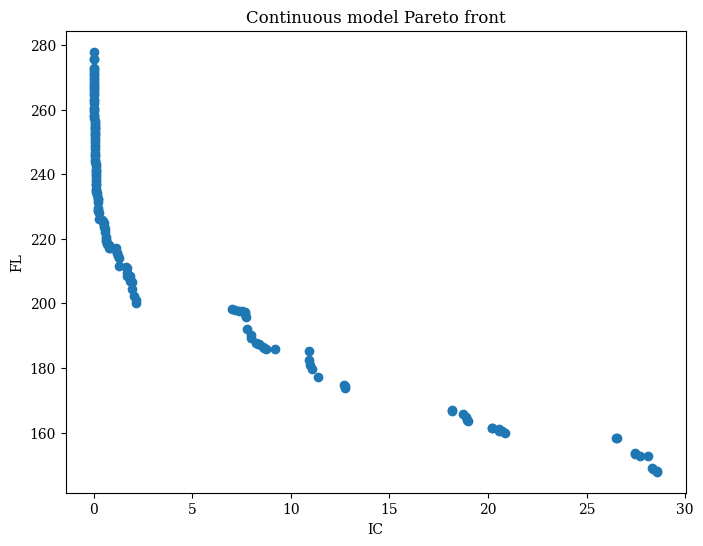

In [10]:
F = res.opt.get("F")
plot = Scatter(
    title="Continuous model Pareto front",
    labels=['IC', 'FL']
)
plot.add(F)
plot.show()